In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook
import stochoptim.stochprob.facility_location.facility_location_problem as flp
import stochoptim.stochprob.facility_location.facility_location_solution as fls
import stochoptim.stochprob.facility_location.facility_location_uncertainty as flu

### Generate Problem Parameters

In [20]:
n_facility_locations = 5
n_client_locations = 10
n_zones = 1
#------------
param = flp.generate_random_parameters(n_facility_locations, n_client_locations, n_zones)
param

{'pos_client': array([[0.00513281, 0.50401505],
        [0.42719784, 0.46034109],
        [0.67008546, 0.93269716],
        [0.13172273, 0.99717001],
        [0.10870942, 0.46242238],
        [0.0042998 , 0.39859181],
        [0.69054077, 0.10207039],
        [0.62455284, 0.61869349],
        [0.87477812, 0.17463966],
        [0.36148866, 0.61057439]]),
 'pos_facility': array([[0.33726366, 0.09929395],
        [0.14053608, 0.67887782],
        [0.07513024, 0.64180466],
        [0.15007635, 0.72158376],
        [0.1001105 , 0.51497332]]),
 'opening_cost': array([42, 45, 63, 70, 77]),
 'facility_capacity': array([44, 49, 52, 47, 56]),
 'max_facilities': 5,
 'min_facilities_in_zone': array([1]),
 'facility_in_zone': array([0, 0, 0, 0, 0]),
 'penalty': array([1000., 1000., 1000., 1000., 1000.])}

### Instantiate Problem

In [21]:
facility_problem = flp.FacilityLocationProblem(param)
facility_problem

Facility Location Problem: (2 stages)
  - decision variables: [5, 55]
    - stage 0: 
      - x: 5 (b)
    - stage 1: 
      - y: 50 (b)
      - z: 5 (c)
  - random variables: [0, 10]
    - stage 1: 
      - h: 10

Network: 
  5 facility locations
  10 client locations
  1 zones

### Instantiate Problem Uncertainty

In [22]:
n_scenarios = 20
p = 0.8
#------------------
client_uncertainty = flu.ClientsPresence(n_scenarios, n_client_locations, p=p) 
client_uncertainty

Presence uncertainty 
  - scenarios: 20 
  - features: 10 
    - h: 10 

### Build scenario tree

In [23]:
# get only scenarios of index [1, 5]
scenario_tree = client_uncertainty.get_scenario_tree([1, 5])
scenario_tree

Node               W=1
  Node             W=0.5	scenario={'h': array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1])}
  Node             W=0.5	scenario={'h': array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1])}

In [24]:
# get all scenarios
scenario_tree = client_uncertainty.get_scenario_tree()
scenario_tree

Node               W=1
  Node             W=0.05	scenario={'h': array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])}
  Node             W=0.05	scenario={'h': array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1])}
  Node             W=0.05	scenario={'h': array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1])}
  Node             W=0.05	scenario={'h': array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1])}
  Node             W=0.05	scenario={'h': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}
  Node             W=0.05	scenario={'h': array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1])}
  Node             W=0.05	scenario={'h': array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1])}
  Node             W=0.05	scenario={'h': array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1])}
  Node             W=0.05	scenario={'h': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}
  Node             W=0.05	scenario={'h': array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1])}
  Node             W=0.05	scenario={'h': array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1])}
  Node             W=0.05	scenario={'h': array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1])}
  Node           

### Solve the problem on the scenario tree

In [25]:
facility_solution = facility_problem.solve(scenario_tree)
facility_solution

Number of scenario trees: 1 (bushiness: [20.0]) 

Initialize model... Finished. (0.024 sec).
Initialize variables... Finished. (0.016 sec).
Add deterministic constraints at subroot #1... Finished. (0.025 sec).
Define objective function at subtree #1... Finished. (0.010 sec).

Solve scenario tree #1... 
  Precompute variables and parameters... Finished. (0.001 sec).
  Check parameters validity... Finished. (0.001 sec).
  Add random constraints at subtree #1... Finished. (0.012 sec).
  Solve problem at subtree #1... Finished. (0.767 sec).
  Fill scenario tree... Finished. (0.010 sec).
Finished. (0.795 sec).


obj=227.008, gap=0.553%, time=0.7 sec

### Plot optimal solution

<IPython.core.display.Javascript object>


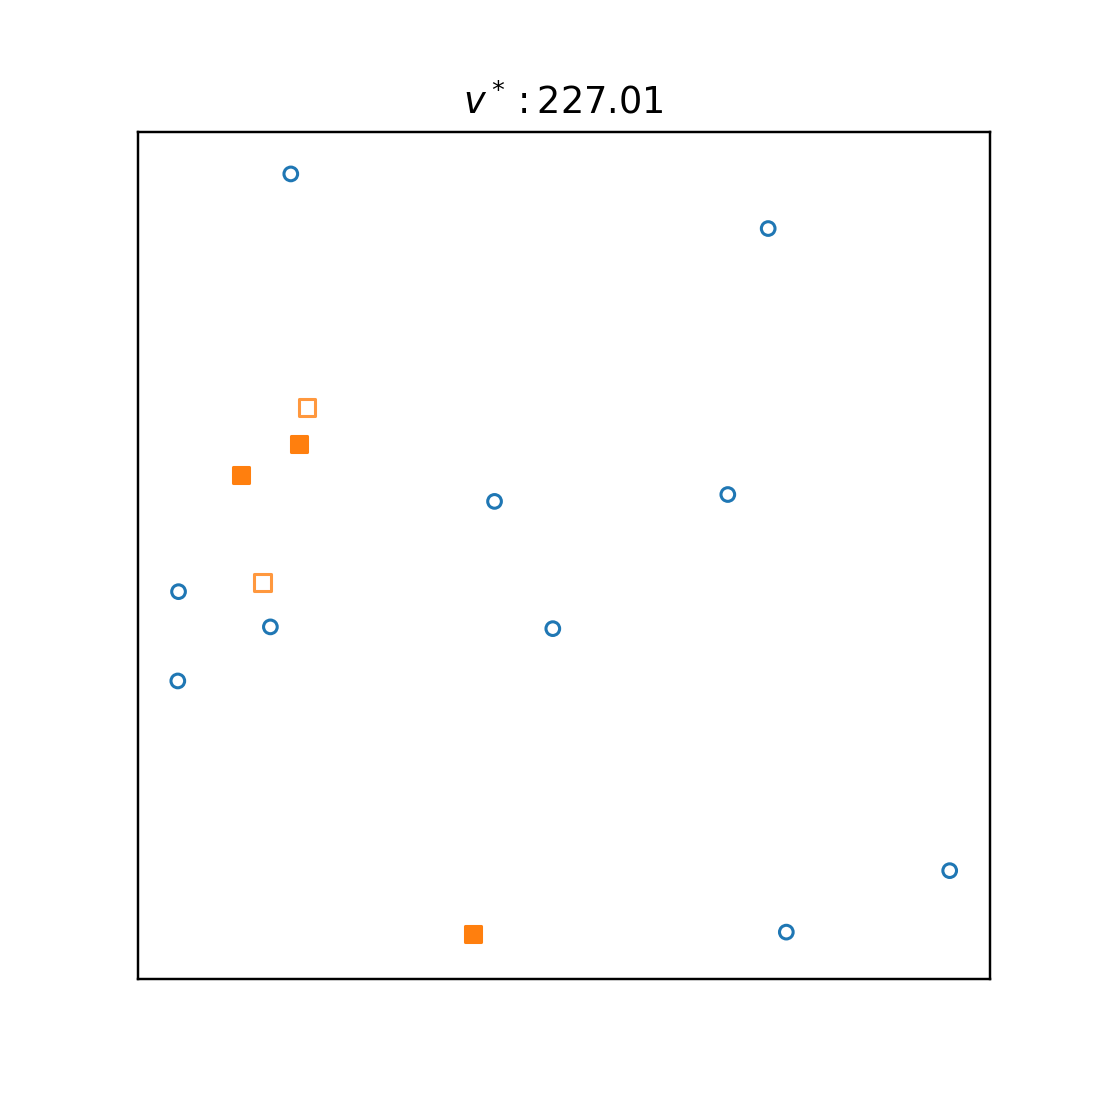

In [26]:
facility_solution.plot_network()

<IPython.core.display.Javascript object>


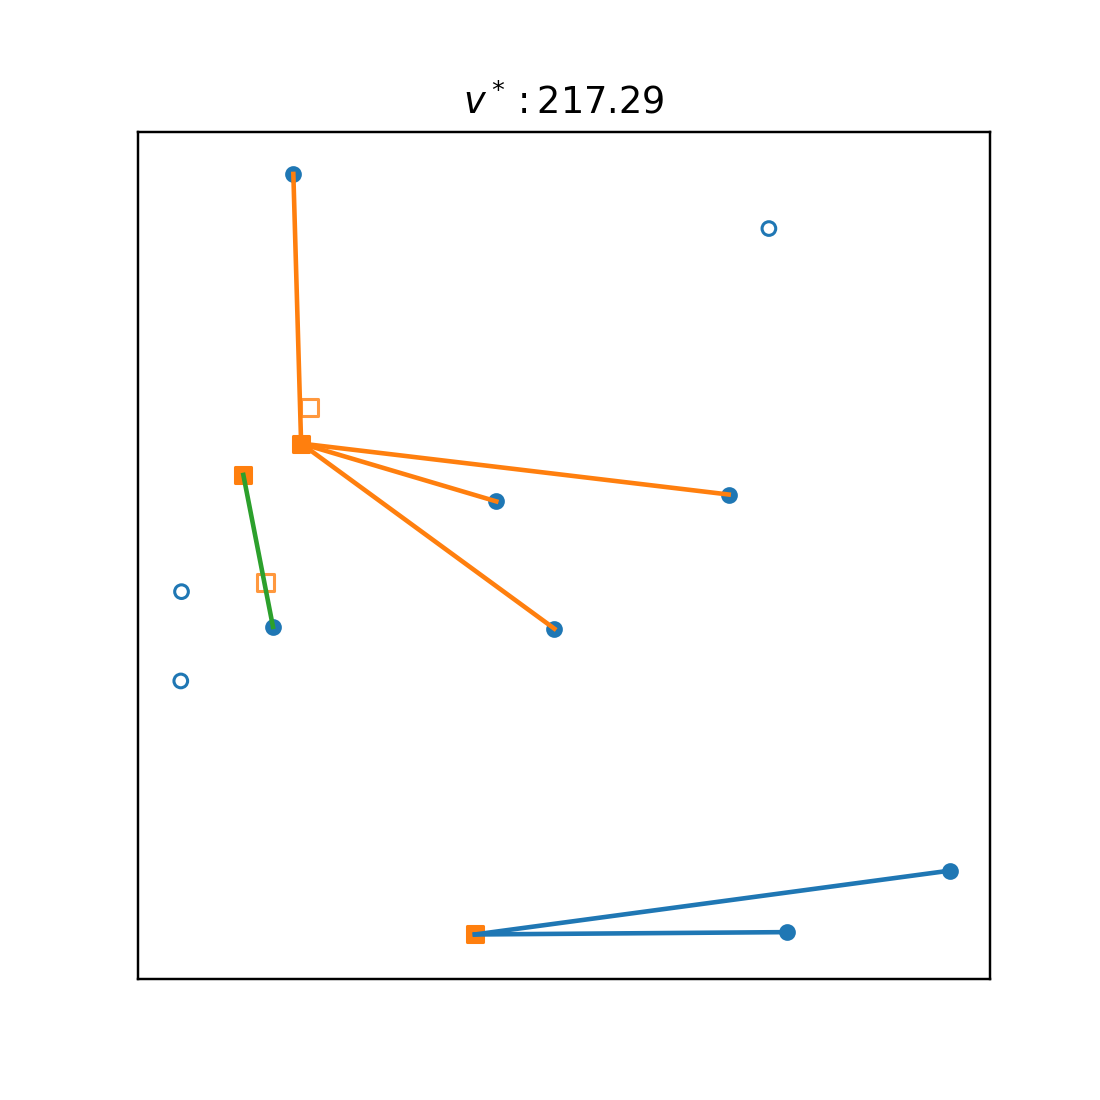

In [27]:
facility_solution.plot_network(scen_index=14)